In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from numpy.linalg import svd
import imageio


In [14]:
# Function to perform image compression
def image_compression(image_matrix, k_values):
    # Perform SVD on the image matrix
    U, sigma, Vt = svd(image_matrix, full_matrices=False)
    
    frobenius_norms = []
    reconstructed_images = []
    
    # Reconstruct the image using top k singular values and compute Frobenius norm
    for k in k_values:
        reconstructed_image_matrix = np.dot(U[:, :k], np.dot(np.diag(sigma[:k]), Vt[:k, :]))
        frobenius_norm = np.linalg.norm(image_matrix - reconstructed_image_matrix, 'fro')
        frobenius_norms.append(frobenius_norm)
        reconstructed_images.append(reconstructed_image_matrix)
    
        # Plot reconstructed image and original image side by side
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(image_matrix, cmap='gray')
        plt.title("Original Image")
        
        plt.subplot(1, 2, 2)
        plt.imshow(reconstructed_image_matrix, cmap='gray')
        plt.title("Reconstructed Image (k={}, Frobenius Norm={:.2f})".format(k, frobenius_norm))
        
        plt.show()
    
    # Plot reconstruction loss for all values of k
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, frobenius_norms, marker='o')
    plt.title("Reconstruction Loss vs. k")
    plt.xlabel("k (Number of Singular Values)")
    plt.ylabel("Frobenius Norm (Reconstruction Loss)")
    plt.grid(True)
    plt.show()

# Function to perform image 

In [15]:
# Function to perform image denoising
def image_denoising(original_image_matrix, noise_std):
    # Add Gaussian noise to the original image
    para=20
    noisy_image_matrix = original_image_matrix + para*np.random.randn(*original_image_matrix.shape)
    
    # Perform SVD on the noisy image
    U, sigma, Vt = svd(noisy_image_matrix, full_matrices=False)
    
    N=noisy_image_matrix.shape[0]

    cutoff=(4/np.sqrt(3))*np.sqrt(N)*para
    
    # Determine the optimal rank for truncating the SVD (e.g., using a threshold)
    optimal_rank = np.max(np.where(sigma>cutoff))+1
    
    # Reconstruct the denoised image using truncated SVD
    denoised_image_matrix = np.dot(U[:, :optimal_rank], np.dot(np.diag(sigma[:optimal_rank]), Vt[:optimal_rank, :]))
    
    # Plot original, noisy, and denoised images for comparison
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(original_image_matrix, cmap='gray')
    plt.title("Original Image")
    
    plt.subplot(1, 3, 2)
    plt.imshow(noisy_image_matrix, cmap='gray')
    plt.title("Noisy Image")
    
    plt.subplot(1, 3, 3)
    plt.imshow(denoised_image_matrix, cmap='gray')
    plt.title("Denoised Image (Rank={})".format(optimal_rank))
    
    plt.show()



C:\Users\Rishabh\AppData\Local\Temp\ipykernel_13648\3899068099.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  original_image = imageio.imread('image.ppm')


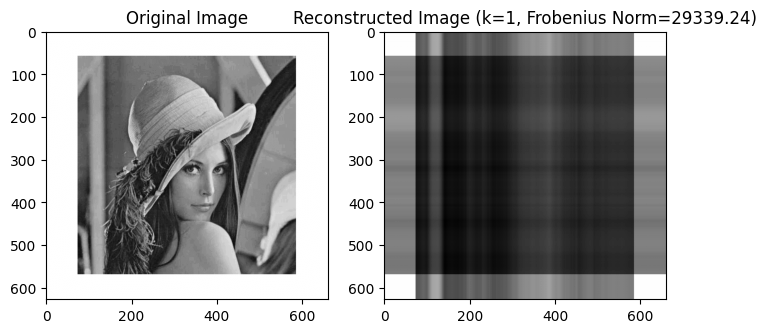

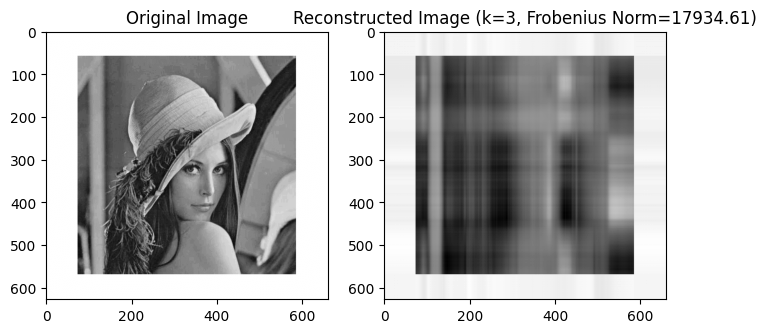

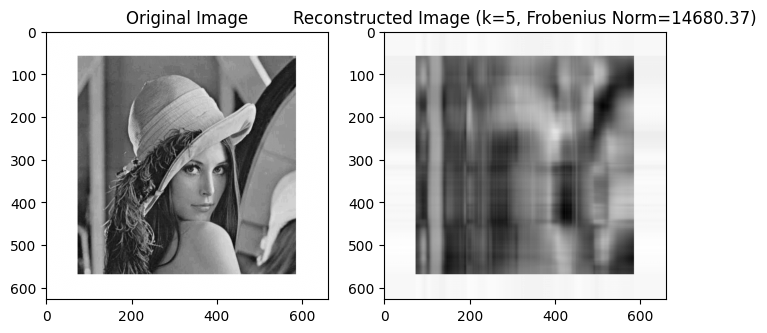

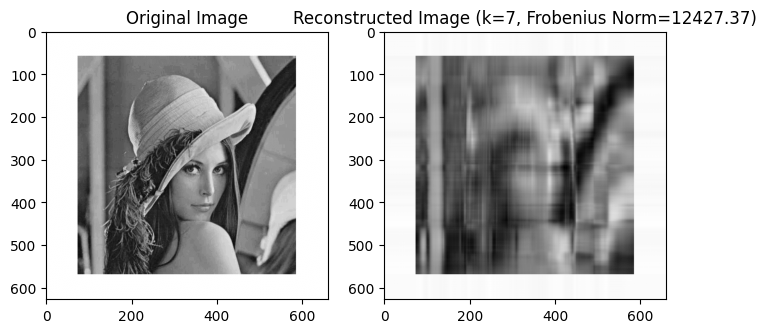

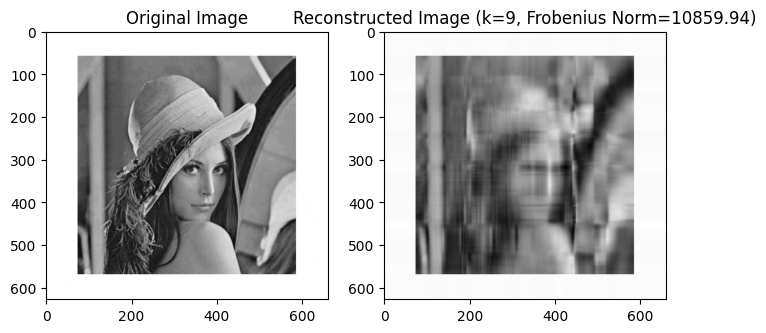

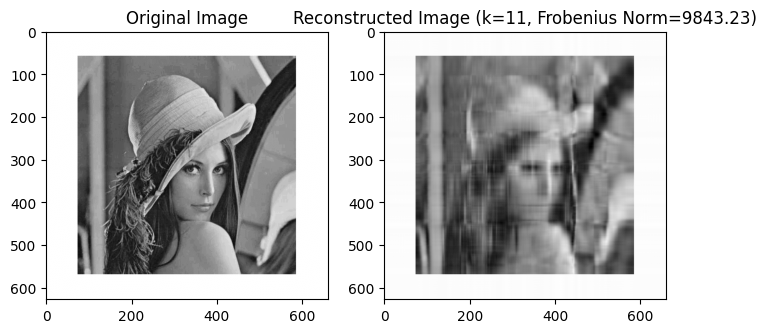

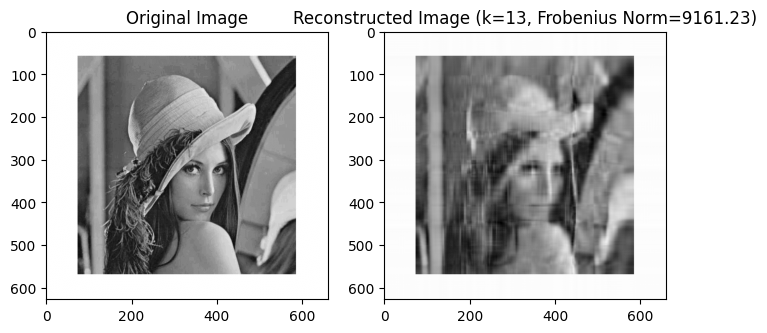

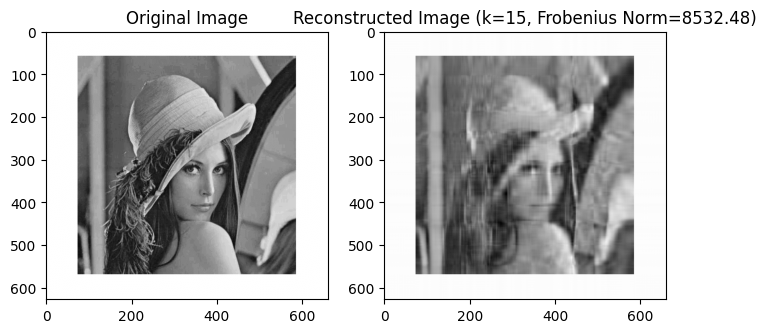

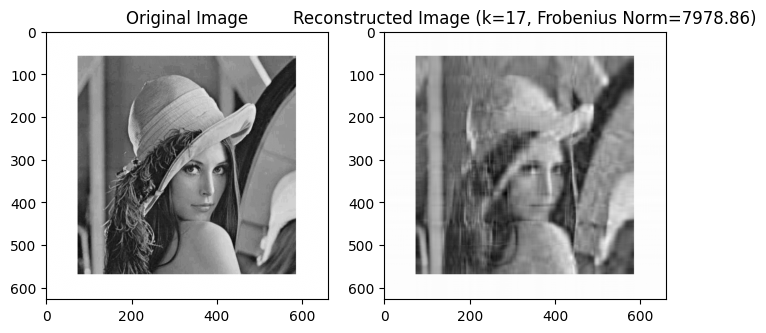

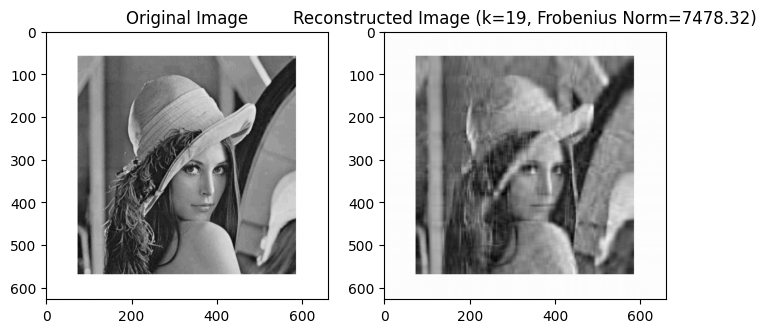

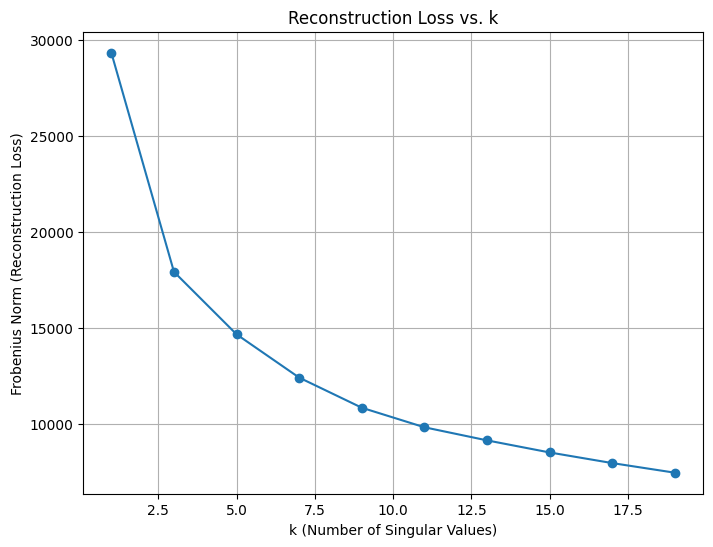

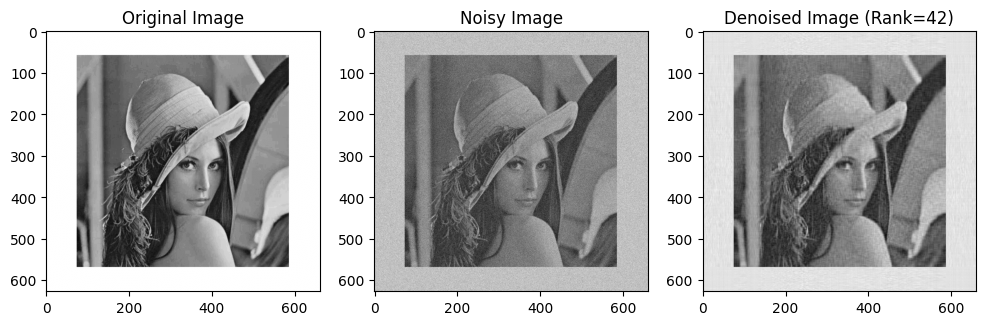

In [16]:
# Read the image in ppm format
original_image = imageio.imread('image.ppm')

# Convert the image to grayscale
original_image_gray = original_image.mean(axis=2)

# Define values of k for image compression
k_values = range(1, 21 ,2)  # Example: consider top 20 singular values

# Perform image compression
image_compression(original_image_gray, k_values)

# Define standard deviation of Gaussian noise
noise_std = 100  # Example: adjust as needed

# Perform image denoising
image_denoising(original_image_gray, noise_std)